# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

weather_response = requests.get(query_url)
weather_json = weather_response.json()

weather_json


{'coord': {'lon': 37.6156, 'lat': 55.7522},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 54.21,
  'feels_like': 52.66,
  'temp_min': 52.23,
  'temp_max': 56.75,
  'pressure': 1024,
  'humidity': 71,
  'sea_level': 1024,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 9.98, 'deg': 16, 'gust': 14.12},
 'clouds': {'all': 4},
 'dt': 1665397448,
 'sys': {'type': 2,
  'id': 2018597,
  'country': 'RU',
  'sunrise': 1665373767,
  'sunset': 1665413007},
 'timezone': 10800,
 'id': 524901,
 'name': 'Moscow',
 'cod': 200}

In [5]:
temperature = []
humidity = []
cloudiness = []
windspeed = []
lat = []
lng = []
date = []
countries = []
City=[]

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        humidity.append(response["main"]["humidity"])
        temperature.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        countries.append(response["sys"]["country"])
        City.append(city)
        print(f"City processed {city}")
    except:
        print(f"City not processed {city}")
        
        pass

City processed busselton
City processed new norfolk
City processed chuy
City not processed taolanaro
City processed kushima
City processed ushuaia
City not processed ozgon
City processed lucapa
City processed zhanaozen
City not processed saleilua
City processed midland
City processed ponta do sol
City processed los llanos de aridane
City processed port alfred
City processed cape town
City processed chak azam sahu
City processed butaritari
City processed puerto ayora
City processed saint george
City processed nara
City processed nikolskoye
City not processed jiddah
City processed kindu
City processed pevek
City not processed turtkul
City not processed mahadday weyne
City not processed barentsburg
City processed bandarbeyla
City processed talnakh
City processed nyurba
City processed tasiilaq
City processed fortuna
City processed darnah
City processed rikitea
City processed half moon bay
City processed tautira
City processed albany
City processed sao filipe
City processed grindavik
City p

City processed rosarito
City not processed potma
City not processed asayita
City processed boshnyakovo
City processed saint-pierre
City processed lavrentiya
City processed mayya
City processed jasper
City processed kismayo
City processed nakusp
City not processed dzhusaly
City not processed tasbuget
City processed oussouye
City processed imbituba
City processed tefe
City processed traralgon
City not processed bargal
City processed syracuse
City processed alice springs
City processed tirau
City processed adrar
City processed sisimiut
City processed laguna de perlas
City processed petropavlovsk-kamchatskiy
City processed cabedelo
City processed zhoucheng
City not processed grand river south east
City processed vila velha
City processed berlevag
City not processed tiruvottiyur
City processed havelock
City processed guane
City processed muros
City processed loukhi
City processed touros
City processed beringovskiy
City processed eshowe
City processed labuhan
City processed salalah
City proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
a = {"City": City,"Lat": lat,"Lng": lng,"Max_Temp": temperature,"Humidity": humidity,"Cloudiness": cloudiness,"Wind Speed": windspeed,"Country": countries,"Date": date}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()
df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.3333,56.17,64,19,14.16,AU,1665397565
1,new norfolk,-42.7826,147.0587,54.91,60,55,2.3,AU,1665397694
2,chuy,-33.6971,-53.4616,45.77,75,0,2.64,UY,1665397694
3,kushima,31.4583,131.2333,61.61,68,100,9.73,JP,1665397696
4,ushuaia,-54.8,-68.3,49.66,53,75,14.97,AR,1665397469
...,...,...,...,...,...,...,...,...,...
562,sungaipenuh,-2.0833,101.3833,66.79,93,95,1.48,ID,1665397838
563,terrace,54.5163,-128.6035,57.11,100,100,20.71,CA,1665397838
564,tashtyp,52.7939,89.8983,43.48,83,95,10.29,RU,1665397838
565,arawa,-6.2132,155.5367,75.67,88,50,2.59,PG,1665397838


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity100 = df[(df["Humidity"] > 100)].index
humidity100


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = df.drop(humidity100, inplace=False)
clean_city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.3333,56.17,64,19,14.16,AU,1665397565
1,new norfolk,-42.7826,147.0587,54.91,60,55,2.3,AU,1665397694
2,chuy,-33.6971,-53.4616,45.77,75,0,2.64,UY,1665397694
3,kushima,31.4583,131.2333,61.61,68,100,9.73,JP,1665397696
4,ushuaia,-54.8,-68.3,49.66,53,75,14.97,AR,1665397469
...,...,...,...,...,...,...,...,...,...
562,sungaipenuh,-2.0833,101.3833,66.79,93,95,1.48,ID,1665397838
563,terrace,54.5163,-128.6035,57.11,100,100,20.71,CA,1665397838
564,tashtyp,52.7939,89.8983,43.48,83,95,10.29,RU,1665397838
565,arawa,-6.2132,155.5367,75.67,88,50,2.59,PG,1665397838


In [9]:
#export into csv
clean_city_data.to_csv("./output_data/clean_city_data.csv", index=False)

clean_city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.3333,56.17,64,19,14.16,AU,1665397565
1,new norfolk,-42.7826,147.0587,54.91,60,55,2.3,AU,1665397694
2,chuy,-33.6971,-53.4616,45.77,75,0,2.64,UY,1665397694
3,kushima,31.4583,131.2333,61.61,68,100,9.73,JP,1665397696
4,ushuaia,-54.8,-68.3,49.66,53,75,14.97,AR,1665397469
...,...,...,...,...,...,...,...,...,...
562,sungaipenuh,-2.0833,101.3833,66.79,93,95,1.48,ID,1665397838
563,terrace,54.5163,-128.6035,57.11,100,100,20.71,CA,1665397838
564,tashtyp,52.7939,89.8983,43.48,83,95,10.29,RU,1665397838
565,arawa,-6.2132,155.5367,75.67,88,50,2.59,PG,1665397838


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

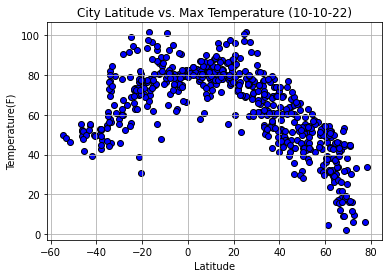

In [10]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max_Temp"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Max_Temp"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Max Temperature ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("output_data/fig1.png")
plt.show()

print(f"The )

## Latitude vs. Humidity Plot

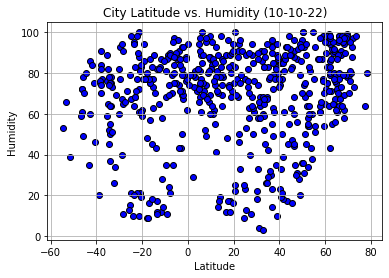

In [11]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Humidity ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

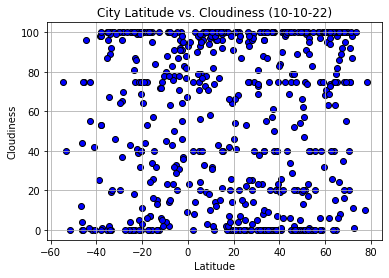

In [12]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Cloudiness ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

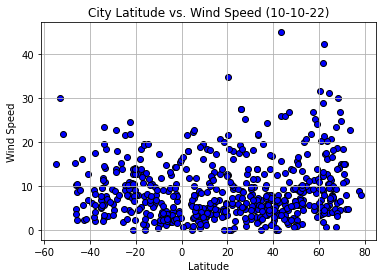

In [13]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Wind Speed ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [38]:
#Creating data frames for Northern and Southern Hemispheres


northern_hem = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) >= 0, :]
southern_hem = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) < 0, :]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.85584516349832
y = -0.87x + 92.96


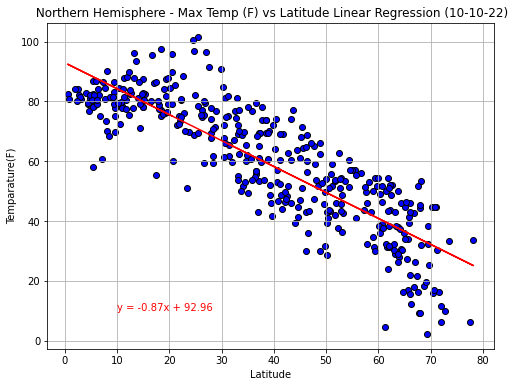

In [108]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Max_Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(10,10),color="red")
plt.xlabel("Latitude")
plt.ylabel("Temparature(F)")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Max Temp (F) vs Latitude Linear Regression ({datestr})")
plt.grid()
plt.savefig("output_data/fig5.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.6428014282218582
y = 0.69x + 85.11


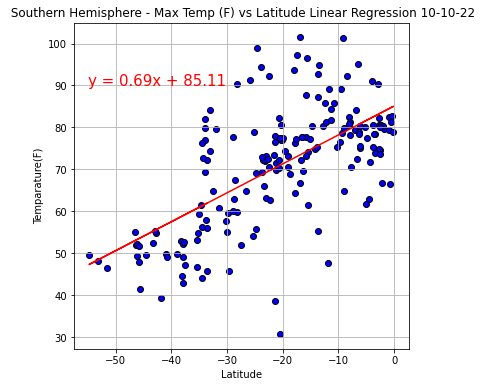

In [109]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Max_Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
fig1, ax1 = plt.subplots(figsize=(6,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temparature(F)")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Max Temp (F) vs Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig6.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.12350985813960672
y = 0.14x + 65.32


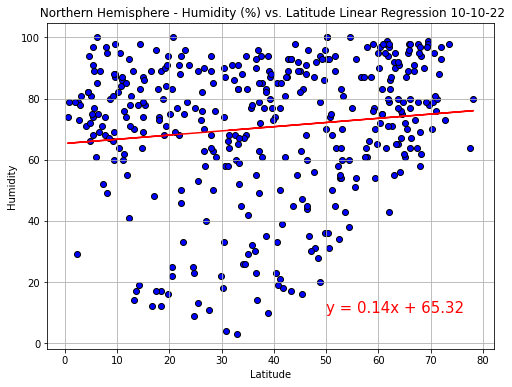

In [110]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig7.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.10930313869348646
y = 0.2x + 69.48


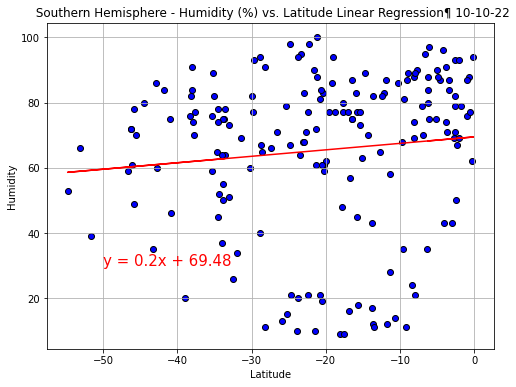

In [111]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶ {datestr}")
plt.grid()
plt.savefig("output_data/fig8.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.07951337093275906
y = 0.15x + 52.45


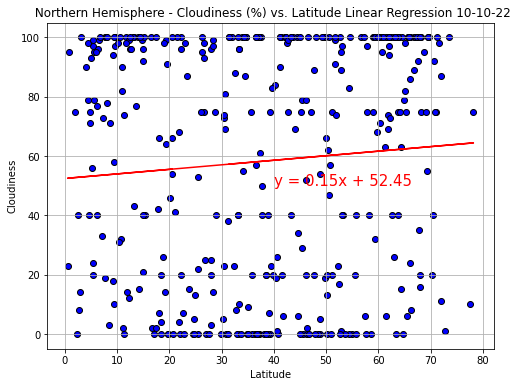

In [112]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig9.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.12344844951516218
y = 0.35x + 61.66


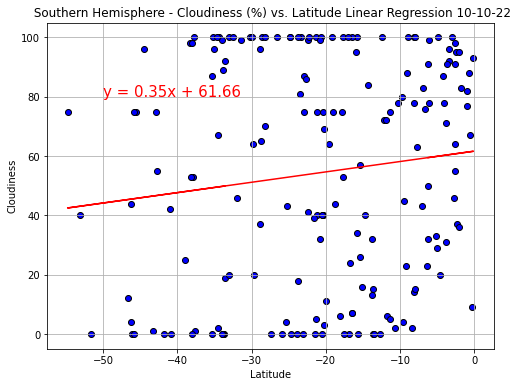

In [113]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig9.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.17027386389828283
y = 0.06x + 6.97


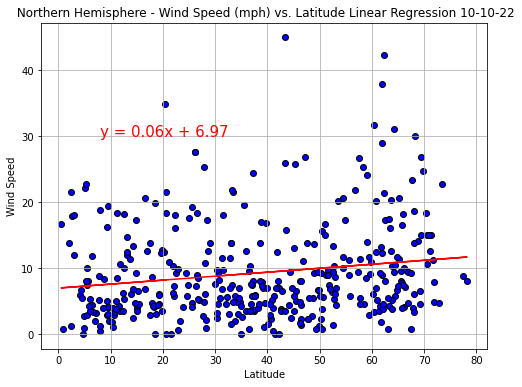

In [114]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(8,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig10.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.24350709923232147
y = -0.1x + 6.36


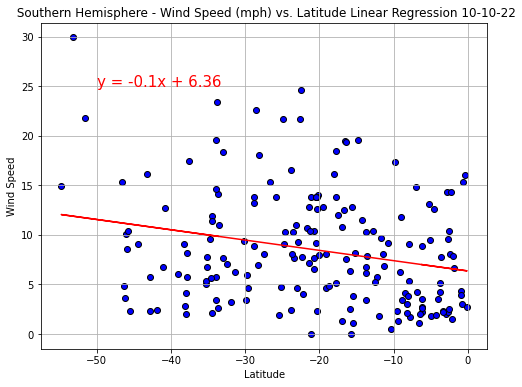

In [115]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig11.png")

plt.show()